<a href="https://colab.research.google.com/github/saraisab/machineLearning/blob/main/ML_data_Science_project_javidascience_estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Study Performance
Enlace al dataset
https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

En este proyecto se limpian los datos categoricamente para realizar modelos


In [12]:
import pandas as pd


students_df = pd.read_csv('study_performance.csv')
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [13]:
students_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
# compruebo si hay valores nulos en el dataset
students_df.isna().sum()


,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [16]:
# compruebo si hay valores duplicados en el dataset
duplicados = students_df.duplicated().sum()
print(f'Los valores duplicados del dataframe son:\n{duplicados}')


Los valores duplicados del dataframe son:
0


In [17]:
# Borramos las filas que hay duplicadas y comprobamos que no hay duplicados
students_df = students_df.drop_duplicates()

if students_df.duplicated().sum() > 0:
    print('Se han limpiado los datos y sigue habiendo duplicados')
else:
    print('Se han limpiado los datos y no quedan duplicados')


Se han limpiado los datos y no quedan duplicados


In [18]:
# compruebo el numero de valores unicos de cada columna
students_df.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


## EDA (Exploratory data analysis)


In [19]:
categories = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']

for i in categories:
  print(f"Categories in {i} variable: ", end= " ")
  print(students_df[i].unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable:  ['none' 'completed']


## Visualización de datos

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

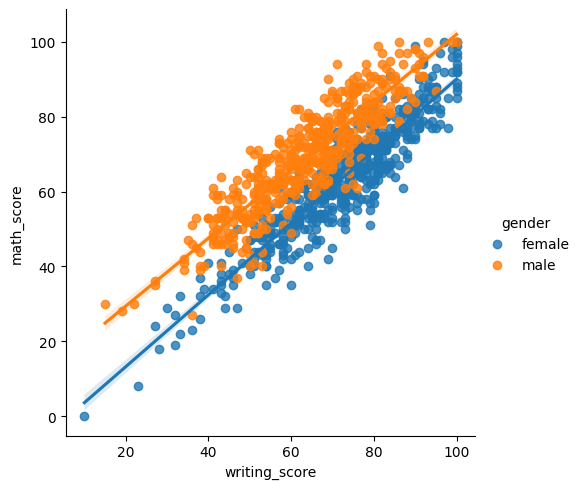

In [22]:
# lmplot
visualizacion_1 = sns.lmplot(data=students_df, x='writing_score', y='math_score', hue='gender')

<Axes: >

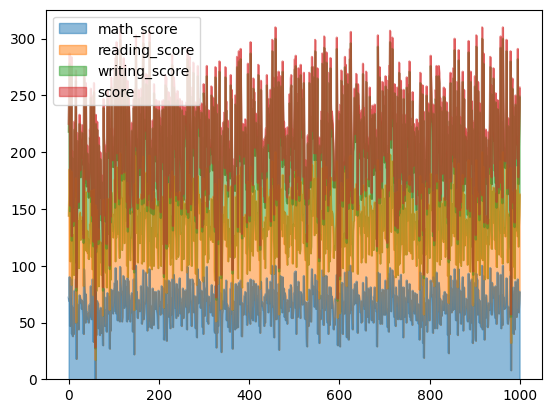

In [27]:
students_df.plot.area(alpha=0.5)

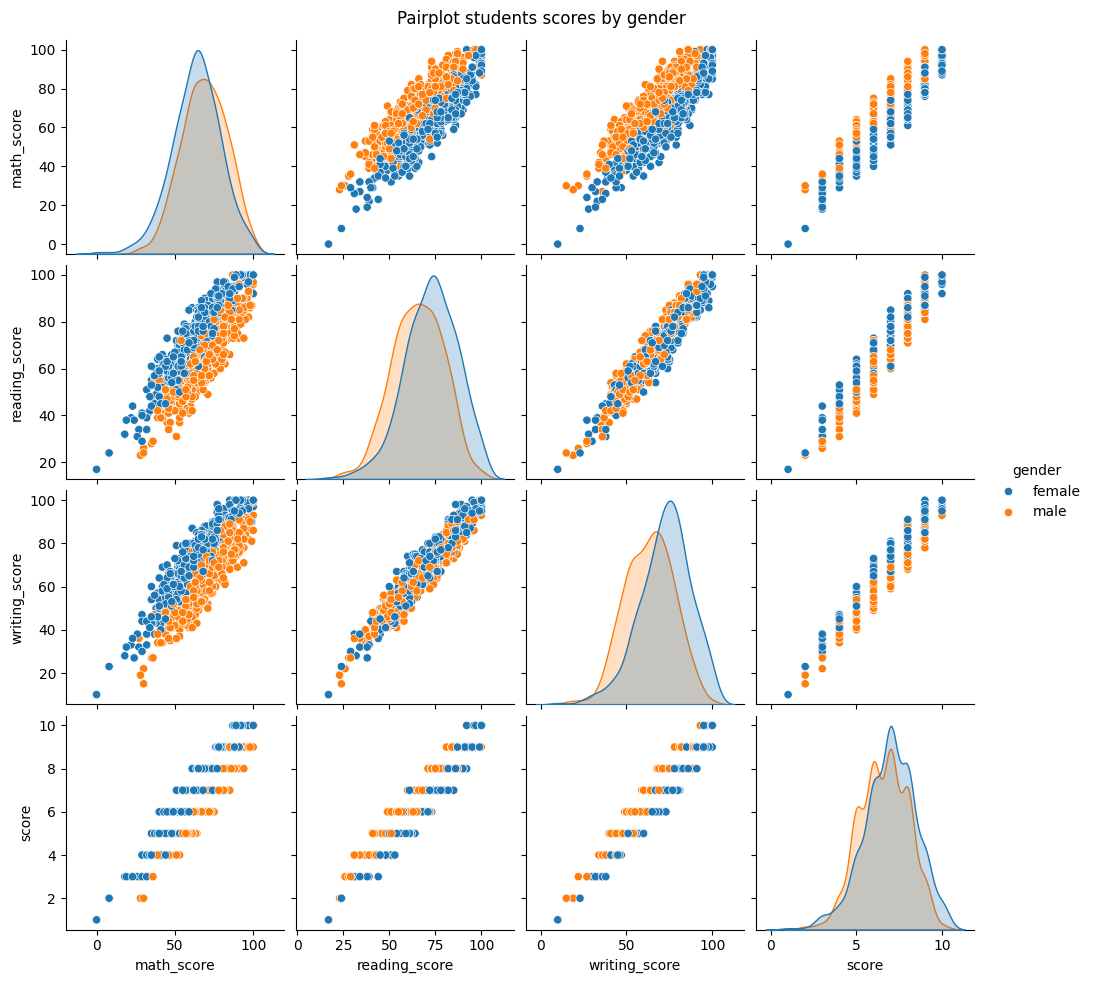

In [47]:
pairplot = sns.pairplot(students_df, hue='gender')
plt.subplots_adjust(top=0.95)
pairplot.fig.suptitle('Pairplot students scores by gender', fontsize=12)
plt.show()

**Nota de matematicas por género**


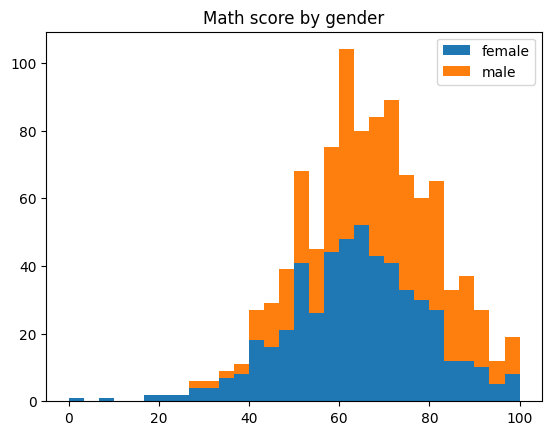

In [40]:
plt.hist([students_df[students_df.gender=='female'].math_score,students_df[students_df.gender=='male'].math_score], bins=30, stacked=True, label=['female', 'male'])
plt.legend()
plt.title("Math score by gender")
plt.show()

**Violinplot scores by gender**

Text(0.5, 1.0, 'Reading score by gender')

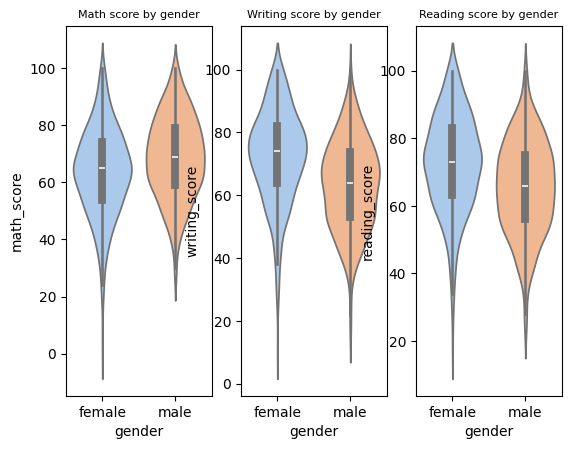

In [61]:
f, axes = plt.subplots(1,3)
k1 = sns.violinplot(data=students_df, y='math_score', x='gender', palette='pastel',ax=axes[0])
k1.set_title('Math score by gender', fontsize=8)
k2 = sns.violinplot(data=students_df, y='writing_score', x='gender', palette='pastel',ax=axes[1])
k2.set_title('Writing score by gender', fontsize=8)
k3 = sns.violinplot(data=students_df, y='reading_score', x='gender' , palette='pastel', ax=axes[2])
k3.set_title('Reading score by gender', fontsize=8)

## Preprocesado

### Variable a predecir: Score

In [23]:
# sacamos el nombre de las columnas de las que queremos predecir los valores
score_columns = [columna for columna in students_df.columns if columna.endswith('score')]
score_columns

['math_score', 'reading_score', 'writing_score']

In [24]:
# para calcular la media de las tres columnas score sumamos el valor de las 3 columnas
# redondeando y despues lo dividimos por 30 para que de un valor de 1 a 10
students_df['score'] = round(students_df[score_columns].sum(axis=1)/30)
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,7.0
1,female,group C,some college,standard,completed,69,90,88,8.0
2,female,group B,master's degree,standard,none,90,95,93,9.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.0
4,male,group C,some college,standard,none,76,78,75,8.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,9.0
996,male,group C,high school,free/reduced,none,62,55,55,6.0
997,female,group C,high school,free/reduced,completed,59,71,65,6.0
998,female,group D,some college,standard,completed,68,78,77,7.0


In [ ]:
# borramos las columnas score dejando solo la que queremos utilizar para el modelo
students_df.drop(columns=score_columns, inplace=True)


In [ ]:
students_df

## Variables categoricas
### **One hot encoding**

In [ ]:
# vamos a pasar todas las variables categoricas a binarios
# primero entrenamos el modelo para que nos de un 0 si es male y un 1 si es female
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
encoded_data = encoder.fit_transform(students_df[['gender']])
encoded_data

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender']))
encoded_df

In [ ]:
# ahora hay que insertar estos datos en el df quitando el campo gender ya existente
students_df = pd.concat([students_df, encoded_df], axis=1)
students_df.drop('gender', axis=1, inplace=True)
students_df

In [ ]:
# ahora hacemos lo mismo para test_preparation_course que tmbn son valores 0 1
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(students_df[['test_preparation_course']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['test_preparation_course']))
students_df = pd.concat([students_df, encoded_df], axis=1)
students_df.drop('test_preparation_course', axis=1, inplace=True)
students_df

In [ ]:
# lo mismo con la columna lunch
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(students_df[['lunch']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['lunch']))
students_df = pd.concat([students_df, encoded_df], axis=1)
students_df.drop('lunch', axis=1, inplace=True)
students_df

In [ ]:
# vamos a realizar lo mismo con la columna race_ethnicity
# primero quiero ver los valores que tiene esta columna
students_df['race_ethnicity'].value_counts()

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(students_df[['race_ethnicity']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['race_ethnicity']))
students_df = pd.concat([students_df, encoded_df], axis=1)
students_df.drop('race_ethnicity', axis=1, inplace=True)
students_df

## Ordinal encoding
Para realizar lo mismo que antes pero teniendo en cuenta que parental_level_of_education si que puede ser significativo a la hora de que un estudiante obtenga una nota, y por eso queremos tenerlo en cuenta a la hora de predecir el modelo

In [ ]:
students_df['parental_level_of_education'].value_counts()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_categories = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
encoder = OrdinalEncoder(categories=[ordinal_categories])
encoded_data = encoder.fit_transform(students_df[['parental_level_of_education']])
df_encoded = pd.DataFrame(encoded_data, columns=['parental_level_of_education_encoded'])
students_df = pd.concat([students_df, df_encoded], axis=1)
students_df.drop('parental_level_of_education', axis=1, inplace=True)
students_df

## Machine Learning
Vamos a probar con dos modelos, random forest y linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = students_df.drop('score', axis=1)
y = students_df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train

In [ ]:
# entrenamos el modelo con random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



In [ ]:
# ahora lo entrenamos con Linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

In [ ]:
# realizamos las predicciones de ambos modelos
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

## Evaluo el modelo

In [ ]:
# ahora va a coger la suma de los errores para saber cual es el mejor modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Random Forest MSE: ", rf_mse)
print("Linear Regression MSE: ", lr_mse)

In [ ]:
print("\nSample predictions:")
num_samples = 5
for i in range(num_samples):
  print(f' - Random Forest: Predicted: {round(rf_predictions[i])}, Actual: {y_test.iloc[i]}')
  print(f' - Linear Regression: Predicted: {round(lr_predictions[i])}, Actual: {y_test.iloc[i]}\n')



R2 (coeficiente de determinación) - evaluación del modelo


Un valor cercano a 1 indica que el modelo explica bien los datos, mientras que valores cercanos a 0 indican un ajuste pobre.

In [ ]:
# ahora voy a evaluar el modelo con r2_score
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

In [ ]:

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R^2: {rf_r2:.2f}")
print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression R^2: {lr_r2:.2f}")

La conclusión es que Linear regression lo hace mejor, aunque con los resultados que da, este método no sería efectivo, porque falla mucho